([<matplotlib.patches.Wedge at 0x7f91b8f53940>,
 [Text(0.21661716774235773, 1.0784604780145073, 'Top 10 Cities'),
  Text(-0.2166171677423579, -1.0784604780145073, 'Other')],
 [Text(0.11815481876855875, 0.5882511698260948, '43.69%'),
  Text(-0.11815481876855884, -0.5882511698260948, '56.31%')])

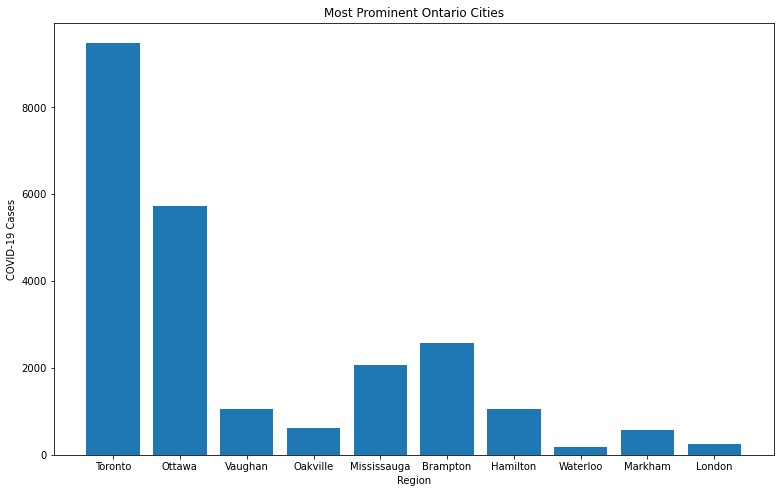

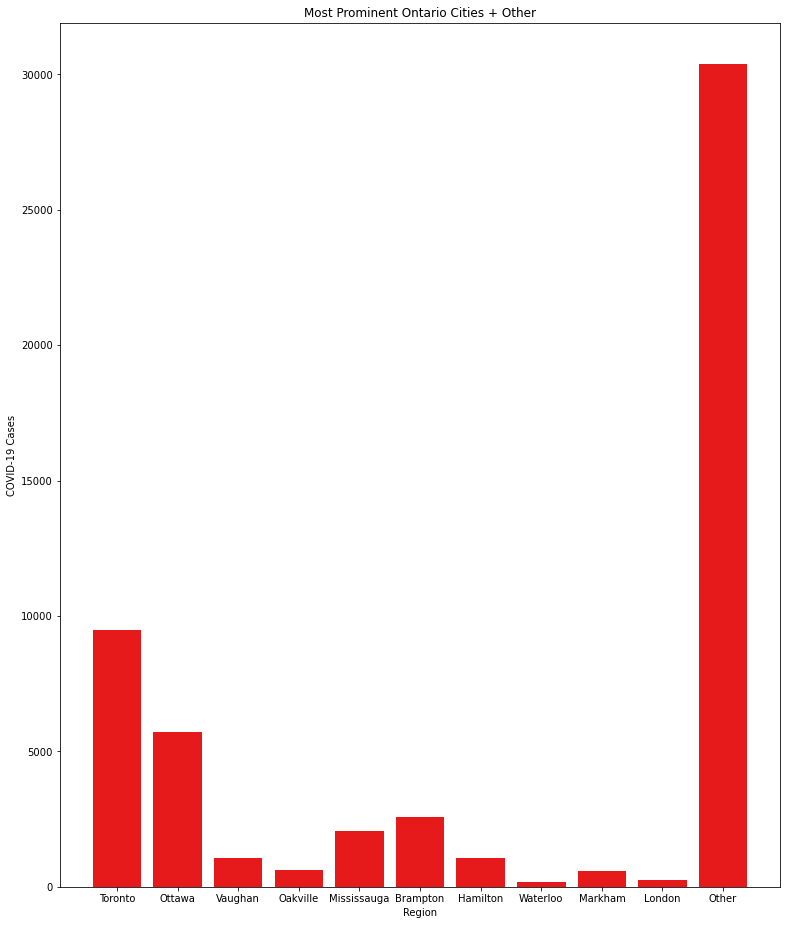

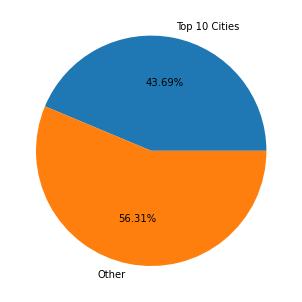

In [1]:
from matplotlib import pyplot as plt

def read_csv(fname):
    '''
    Returns two values:

    (1) a List of str representing the headers of the .csv file

    (2) List of List of values, based on the provided .csv file
    with filename fname.

    The format of this returned list of values
    is demonstrated in the following example.
    For demographic.csv, which looks like the
    following when you open it
    in Notepad, or any other simple text editor:


    Name, Age, Sex
    Bob, 22, M
    Mary, 21, F
    Joe, 28, M


    Then read_csv("demographic.csv") would return:

    (1) ["Name", "Age", "Sex"]

    (2)
    
    [
        [Bob, Mary, Joe],
        [22,  21,   28],
        [M,   F,    M]
    ]

    Note that this function assumes the .csv file has a header at the top
    indicating the column names.
    
    '''
    
    f = open(fname, 'r', encoding="utf-16")    

    header = f.readline().split(',')
    num_cols = len(header)
    return_vals = []
    for i in range(num_cols):
        return_vals.append([])
        header[i] = header[i].strip()

    for line in f:
        items = line.strip().split(',')
        for i in range(len(items)):
            return_vals[i].append(items[i].strip())
    
    f.close()

    return header, return_vals



list1, list2 = read_csv('schools.csv')
#list1 is the headers, list2 is the entries
regions = [0,0,0,0,0,0,0,0,0,0,0]
regions_name = ['Toronto', 'Ottawa', 'Vaughan', 'Oakville', 'Mississauga', 'Brampton', 'Hamilton', 'Waterloo', 'Markham', 'London','Other']
#11 Elements in the list, each representing covid cases in a certain area in the order shown in the second list.
for x in range(len(list2[7])):
    if list2[3][x] == 'Toronto':
        regions[0] = regions[0] + int(list2[7][x])
    if list2[3][x] == 'Ottawa':
        regions[1] = regions[1] + int(list2[7][x])
    if list2[3][x] == 'Vaughan':
        regions[2] = regions[2] + int(list2[7][x])
    if list2[3][x] == 'Oakville':
        regions[3] = regions[3] + int(list2[7][x])
    if list2[3][x] == 'Mississauga':
        regions[4] = regions[4] + int(list2[7][x])
    if list2[3][x] == 'Brampton':
        regions[5] = regions[5] + int(list2[7][x])
    if list2[3][x] == 'Hamilton':
        regions[6] = regions[6] + int(list2[7][x])
    if list2[3][x] == 'Waterloo':
        regions[7] = regions[7] + int(list2[7][x])
    if list2[3][x] == 'Markham':
        regions[8] = regions[8] + int(list2[7][x])
    if list2[3][x] == 'London':
        regions[9] = regions[9] + int(list2[7][x])
    else: 
        regions[10] = regions[10] + int(list2[7][x])

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([1,1,1,2])

ax.bar(regions_name[0:10], regions[0:10])
#Ignoring the Other section, as it is way too big and would distort the graph

# setting the labels
ax.set_xlabel("Region")
ax.set_ylabel("COVID-19 Cases")
ax.set_title("Most Prominent Ontario Cities")

fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_axes([1,1,1,2])

ax2.bar(regions_name, regions, color=(0.9, 0.1, 0.1, 1))
#With Other this time


# setting the labels
ax2.set_xlabel("Region")
ax2.set_ylabel("COVID-19 Cases")
ax2.set_title("Most Prominent Ontario Cities + Other")


#3rd Graph Compares the most prominent Ontario cities as a whole to the rest of Ontario. As a pie chart.

fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])

top_ten_cities = 0

for z in regions[0:10]:
    top_ten_cities = top_ten_cities + z
    

ax3.pie([top_ten_cities, regions[10]],labels = ['Top 10 Cities', 'Other'],autopct='%1.2f%%')

###### 